<a href="https://colab.research.google.com/github/KartikKumar7070/Airbnb-Dataset/blob/main/ML_Capstone_Project_On_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -**Yes Bank Stock Closing Price Prediction** 



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

#####The Dataset contains information about the YES BANK Stock Prediction.We have 185 rows and 5 columns in our Dataset. We are having columns- Date, Open, Close, High, Low. 
#####In a first step, I have imported the dataset through pandas ’read_csv’ then performed the Data wrangling over the raw data after that, I have divided the whole data set into various groups like feature engineering, Univariate analysis, Bivariate analysis and divide the model into various regressions.
#####As there is no null values in the dataset we didn't got a chance to replace or remove the null values. Also we have find out the outlier with the help of boxplot. 
#####Then I have started with the EDA(exploratory data analysis), In which firstly we have gone through the opening and closing stock prices with the help of line graph for the last three years then we have drawn a scatter plot in which we have done yearly analysis of the opening and closing stock for all years. 
#####After that I have done a graphical representation of the dependent and independent variables. And find out the relationship between dependent and independent variable. 
#####Now, I have checked the correlation among each using the Heat map, there was a very high correlation among independent features which means high multicollinearity in our model. Due to the fact that each column is equally crucial for prediction, we are not deleting any columns. 
#####After this I have divided our dataset into train and test data splitted into 80-20. Then, we fit our dataset into various models like Linear regression, Lasso regression, Ridge regression and K-nearest neighbour, XG-Boost. And after analyzing the result from these regression model. The perfect fit model for this dataset is a Linear Regression.

# **GitHub Link -**

https://github.com/KartikKumar7070/Yesbank-stock-pricing-analysis-regression-model.git

# **Problem Statement**


###Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [181]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import *

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR
from xgboost import XGBRegressor
from sklearn import neighbors
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
     

### Dataset Loading

In [72]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')
     

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [182]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/ML Capstone Regression Project-1(YBCPP)/data_YesBank_StockPrices.csv')

### Dataset First View

In [183]:
# Dataset First Look
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [75]:
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


### Dataset Rows & Columns count

In [217]:
df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y')))


In [184]:
# Dataset Rows & Columns count
df.shape

(185, 5)

### Dataset Information

In [185]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [186]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [79]:
# Missing Values/Null Values Count
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

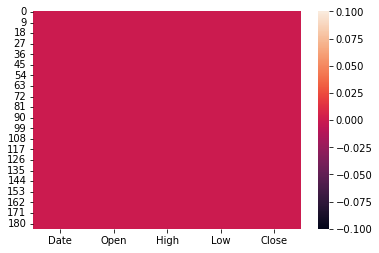

In [187]:
# Visualizing the missing values
sns.heatmap(df.isnull(),cbar=True) 

### What did you know about your dataset?

###This dataset of Yes Bank gives us information about the opening and closing prices of our stock,here our independent variable are Date,Open,High,Low columns and close column is our dependent variable that we need to predict.This dataset is a really good dataset as there are no null or duplicated values so we need not to do any manipulations in our dataset so far.We need to convert our date column to proper date time format.

## ***2. Understanding Your Variables***

In [188]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [189]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description 


We have 185 rows and 4 columns in our dataset with no null values. Here our dependent variable will be *Close*, and independent variables are - *Open, High  and Low*.

* **Date:**  It denotes the month and year of the for a particular price.
* **Open:**  Open means the price at which a stock started trading that month.
* **High:**  refers to the maximum price that month.
* **Low:**   refers to the minimum price that month.
* **Close:** refers to the final trading price for that month, which we have to predict using regression

### Check Unique Values for each variable.

In [190]:
# Check Unique Values for each variable.
df.nunique()

Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [191]:

#copying data to preserve orignal file
df1 = df.copy()

In [192]:
# converting 'Date' into datetime - YYYY-MM-DD
from datetime import datetime
df1['Date'] = pd.to_datetime(df1['Date'].apply(lambda x: datetime.strptime(x, '%b-%y')))


In [193]:
#set date as index
df1.set_index('Date',inplace=True)

In [194]:
#check if changes are being reflected
df1.head(1)

,Open,High,Low,Close
Date,,,,
2005-07-01,13.0,14.0,11.25,12.46


### What all manipulations have you done and insights you found?

###Mainly in this dataset i have coverted my Date column into datetime format(YY-MM-DD) as the model will not take values other than numeric also in this dataset there is not so much of manipulations as there no null values in the dataset.

# **EDA AND Data Pre-Processing**

###Defing the independenyt and dependent variables

In [195]:
indep_var=df1[['High','Low','Open']]
dep_var=df1['Close']

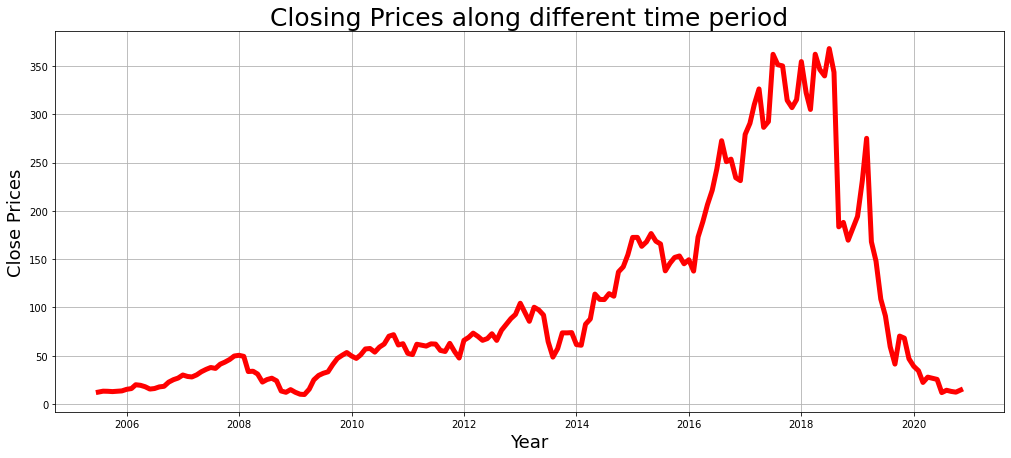

In [218]:
# Visualisation of closing price with respect to dates.
plt.figure(figsize=(17,7))
plt.xlabel('Year', fontsize=18)
plt.ylabel('Close Prices', fontsize=18)
plt.plot(df['Date'], df['Close'],linewidth=5,color='Red')
plt.title('Closing Prices along different time period', fontsize=25)
plt.grid()
plt.show()

# 2018 onwards the closing stock prices have witnessed a downfall and the reason can be the fraud case.
     


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

**UNIVARIATE ANALYSIS**
---
We will take a look at distribution plots of our features.


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


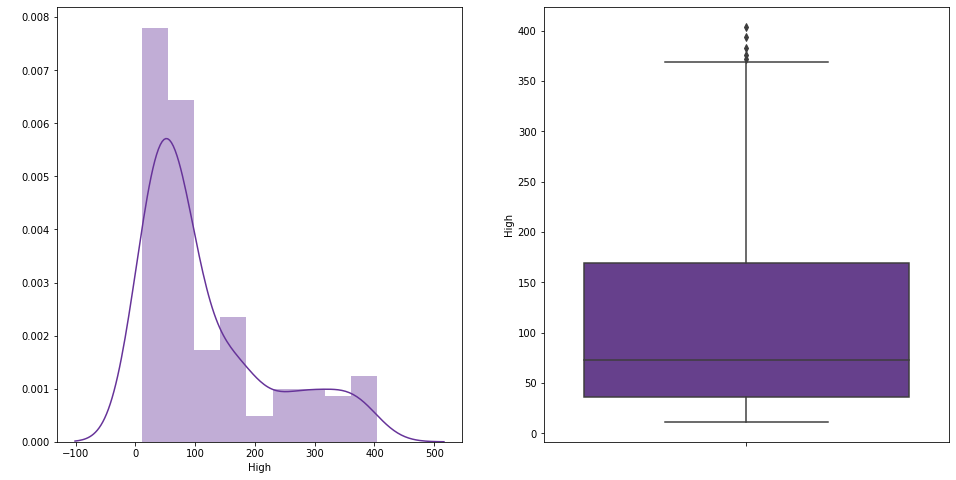

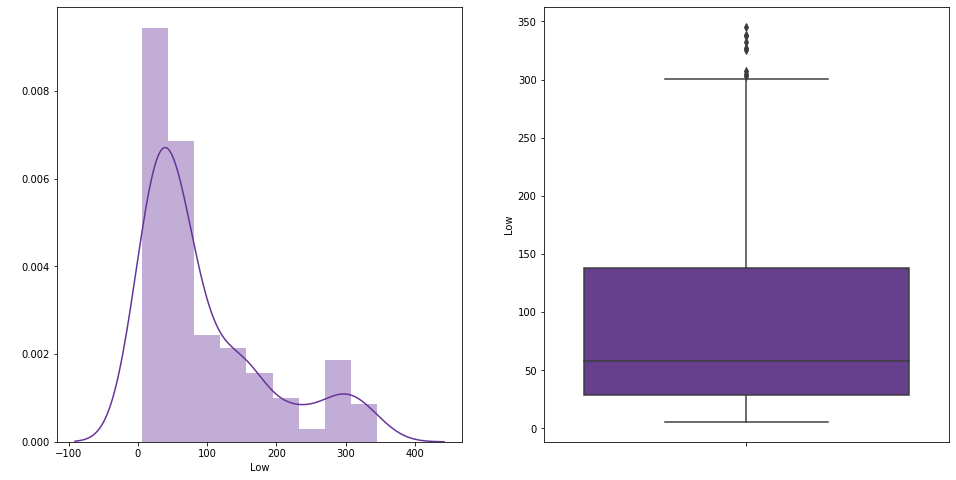

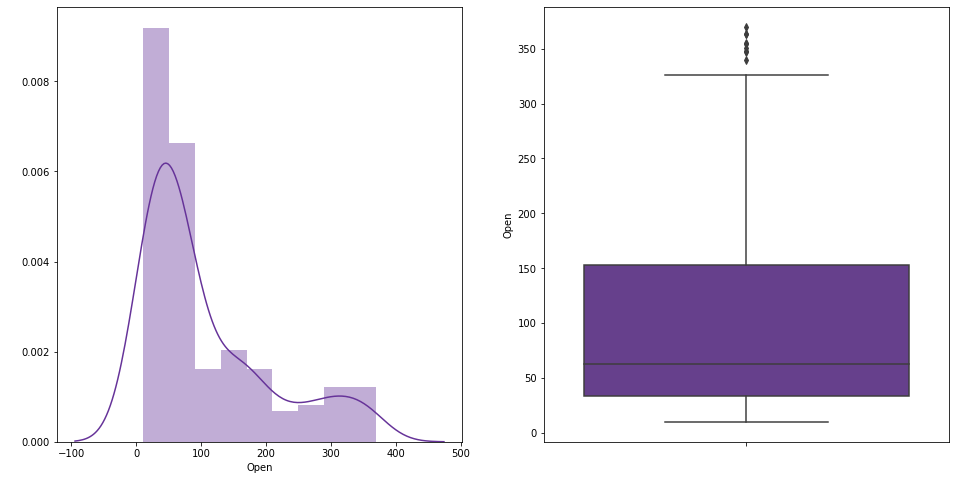

In [201]:
#plots for independent variables
for var in indep_var:
    plt.figure(figsize=(16,8))
    plt.subplot(1, 2, 1)
    fig = sns.distplot(df1[var].dropna(),color='rebeccapurple',)
    fig.set_ylabel(' ')
    fig.set_xlabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.boxplot(y=df1[var],color='rebeccapurple',)
    fig.set_title('')
    fig.set_ylabel(var)



##### 1. Why did you pick the specific chart?

###So here i have chosen distribution plot and boxplot the distribution plot will help me understand how are my independent variable distributed across entire dataset and is there a need for transformation in my dataset and boxplot helps me understand the outliers in my independent variables so that i can understand if any outlier treatment has to be done or not.

##### 2. What is/are the insight(s) found from the chart?

###All my independent variables are skewed both negatively and positively but the concentration of positive is more so we can apply log transformation as it is less skewed and the boxplot shows that there are not much of outliers in my data the outliers that we are seeing in boxplot may add some useful information about the stock pricing so we will not be removing outliers as each observation is important for our stockpricing predictions

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

###People are most sought to buy the stock when the prices are between 0-100 and after that we can see a negative impact in our pricing as less number of people tend to buy afer this range ie. 0-100 is crossed

#### Chart - 2

DATA TRANSFORMATION

---
Since our data is skewed, we will perform some transformations during regression analysis. Let's visualize how our data will look like post transformation.


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


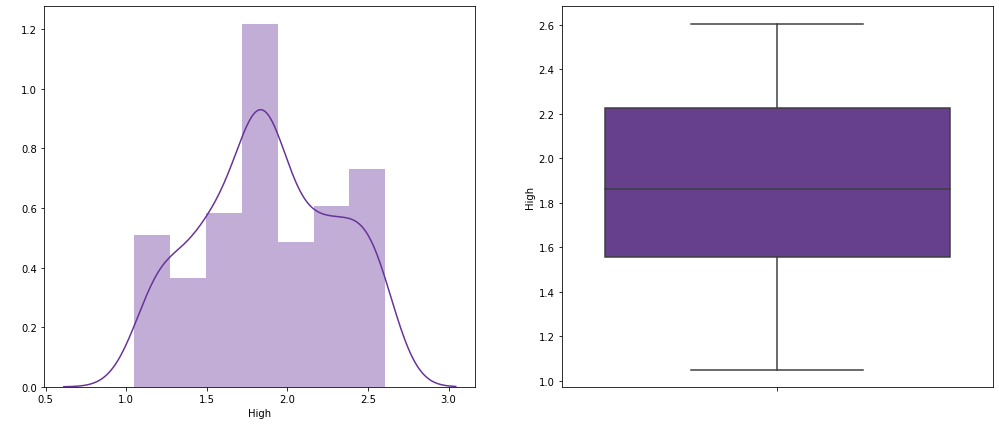

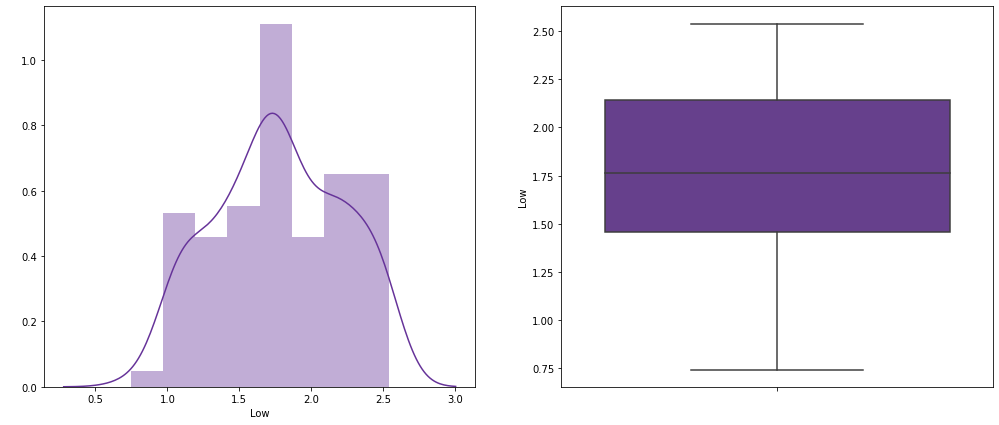

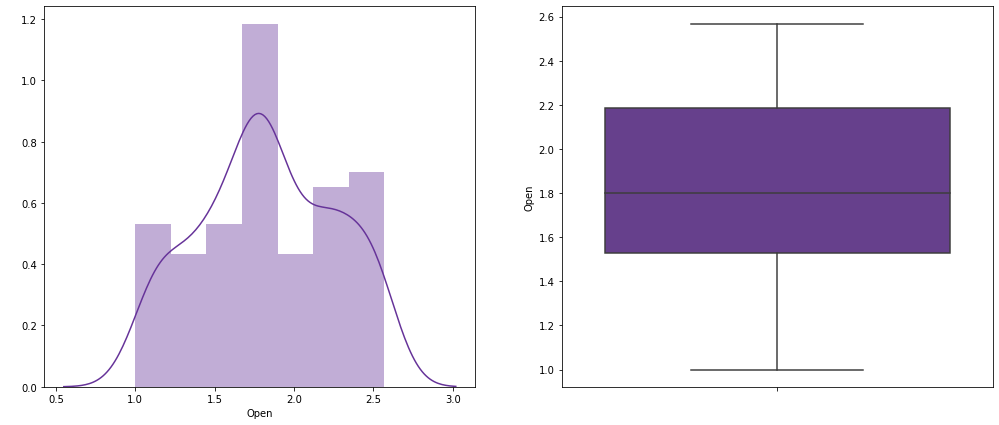

In [208]:

#independent variables
for var in indep_var:
    plt.figure(figsize=(17,7))
    plt.subplot(1, 2, 1)
    fig = sns.distplot(np.log10(df1[var]),color='rebeccapurple')
    fig.set_ylabel(' ')
    fig.set_xlabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.boxplot(y=np.log10(df1[var]),color='rebeccapurple')
    fig.set_title('')
    fig.set_ylabel(var)

##### 1. Why did you pick the specific chart?

###So here i have chosen distribution plot and boxplot the distribution plot will help me understand how are my independent variable distributed across entire dataset and is there a need for transformation in my dataset and boxplot helps me understand the outliers in my independent variables so that i can understand if any outlier treatment has to be done or not.

##### 2. What is/are the insight(s) found from the chart?

###After the transformation has been applied our distribution plot is somewhat extend to a normally distributed and in our boxplot we can see that there are no more outliers aswell.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

###We have just applied the transformation in our independent variables so the only from this we get that is our independent variables are normally distributed and have no outliers aswell,we cannot comment on the positive or negative impact from this.

#### Chart - 3

DEPENDENT VARIABLE

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


Text(0, 0.5, 'Open')

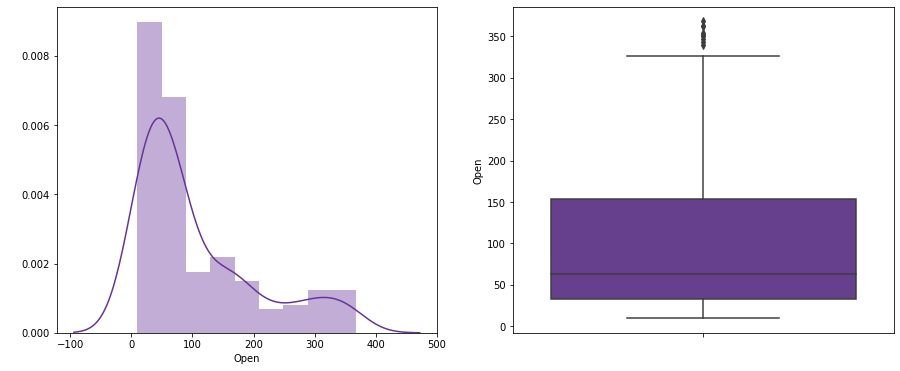

In [209]:
#plots for dependent variable
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.distplot(df1['Close'].dropna(),color='rebeccapurple')
fig.set_ylabel(' ')
fig.set_xlabel(var)

plt.subplot(1, 2, 2)
fig = sns.boxplot(y=df1['Close'],color='rebeccapurple')
fig.set_title('')
fig.set_ylabel(var)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

**BIVARIATE ANALYSIS**

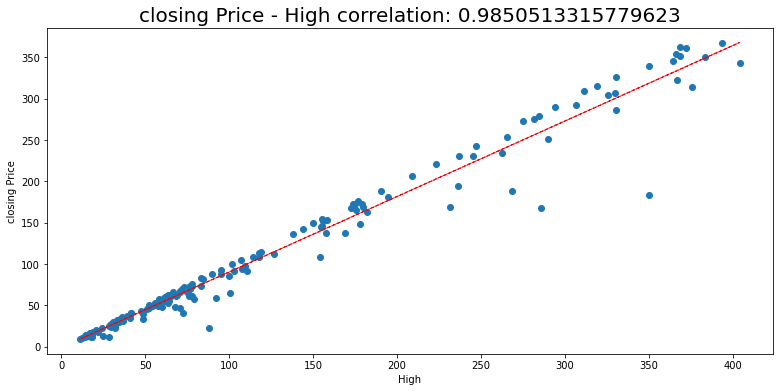

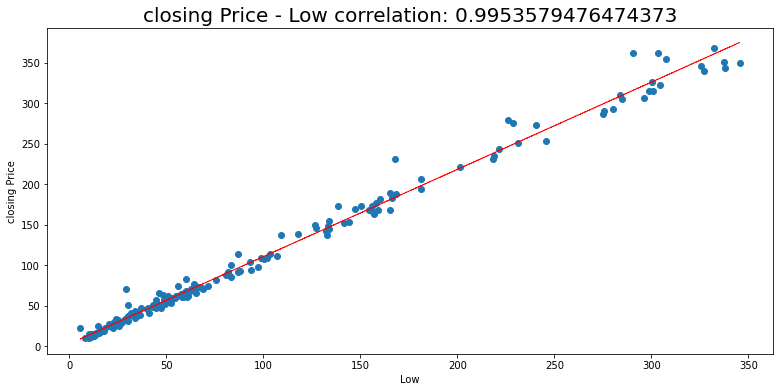

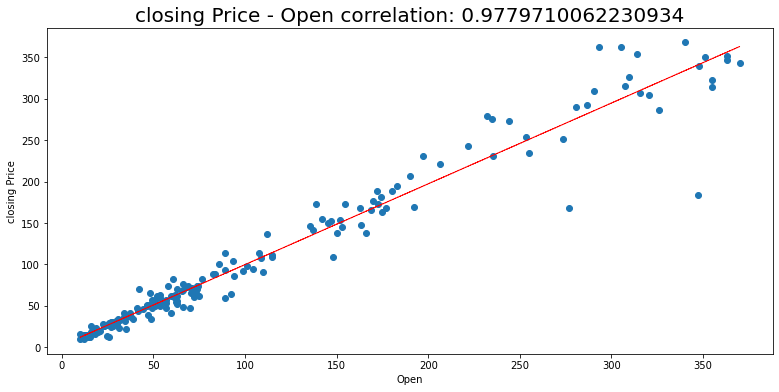

In [211]:
#scatter plot between dependent variable with all independent variables.
for col in indep_var:
   fig = plt.figure(figsize=(13, 6))
   ax = fig.gca()
   feature = df1[col]
   label = df1['Close']
   correlation = feature.corr(label)
   plt.scatter(x=feature, y=label)
   plt.xlabel(col)
   plt.ylabel('closing Price')
   ax.set_title('closing Price - ' + col + ' correlation: ' + str(correlation),fontsize=20)
   z = np.polyfit(df1[col], df1['Close'], 1)
   y_hat = np.poly1d(z)(df1[col])
 
   plt.plot(df1[col], y_hat, "r--", lw=1)
 
plt.show()

##### 1. Why did you pick the specific chart?

#####So here we are using a scatter plot to see how are all my datapoints scattered all over the dataset and also to see how our different independent variables are corelated to the dependent variable also we are using a polyfit of order 1 to see the best fit line. 

##### 2. What is/are the insight(s) found from the chart?

So from our scatter plot we can see all my independent variables ie High,Low,Open are highly corelated to the dependent variable ie Close.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

All my independent variables are positively corelated to my dependent variable so any change in independent variable will affect highly to the dependent variable.We can clearly make out that all the independent variables are linearly affecting our dependent variable.

Chart-5 
###**Correlation Heatmap**

Now, we will see the correlation between all the features in our data set.

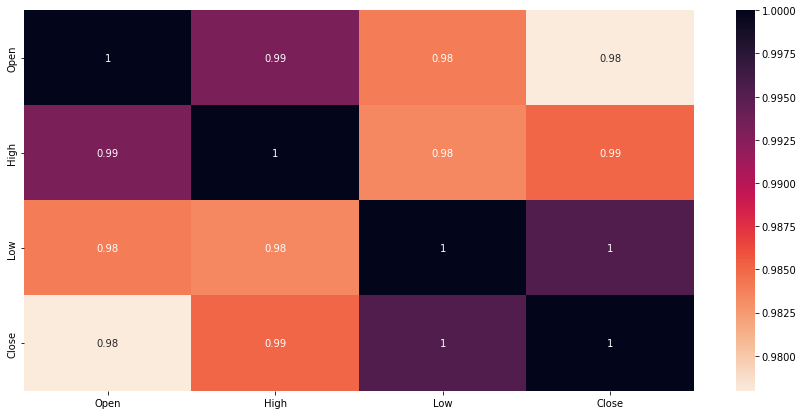

In [212]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,7))
sns.heatmap(df1.corr(), annot = True, cmap='rocket_r')
plt.show()



##### 1. Why did you pick the specific chart?

Correlation heatmaps are a type of plot that visualize the strength of relationships between numerical variables. Correlation plots are used to understand which variables are related to each other and the strength of this relationship.

##### 2. What is/are the insight(s) found from the chart?

From this Corelation heatmap we can see all my independent variable are highly corelated with each other aswell as with dependent variable.

#### Chart - 15 - Pair Plot 

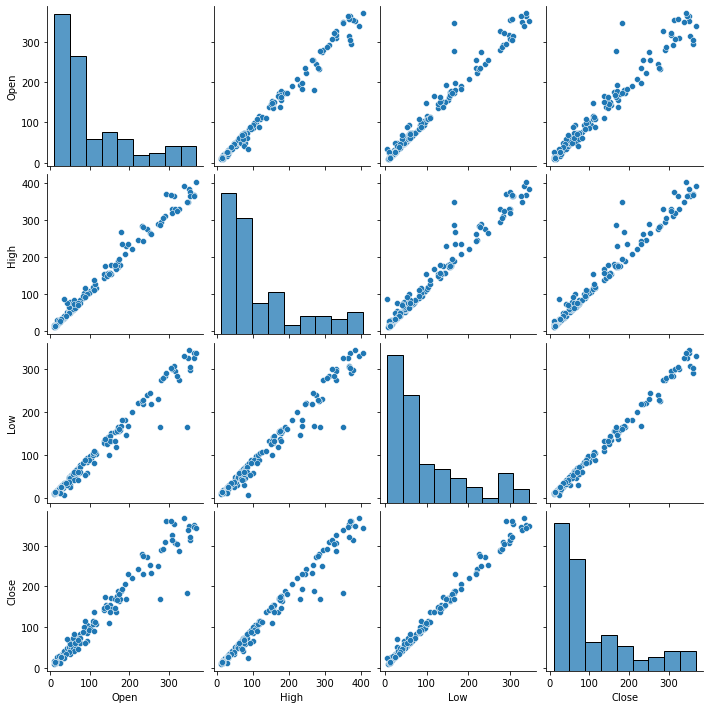

In [215]:
# Pair Plot visualization code
sns.pairplot(df1)

##### 1. Why did you pick the specific chart?

Using a pair-plot we aim to visualize the correlation of each feature pair in a dataset against the class distribution at a one glance.Since a pair plot visually gives an idea of correlation of each feature pair, it helps us to understand and quickly analyse the correlation matrix (Pearson) of the dataset as well.

##### 2. What is/are the insight(s) found from the chart?

From this pairplot we can see all my independent variable are highly corelated with each other aswell as with dependent variable.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

#####Null Hypothesis - Predict the stock’s closing price of the month.
#####Alternate Hypothesis - Not able to predict the stock’s closing price of the month.

#### 2. Perform an appropriate statistical test.

In [95]:
# Perform Statistical Test to obtain P-Value
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [96]:
indep_var = sm.add_constant(indep_var) ## let's add an intercept (beta_0) to our model
model = sm.OLS(dep_var, indep_var).fit() ## sm.OLS(output, input)
predictions = model.predict(indep_var)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [97]:
# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.219e+04
Date:                Sun, 08 Jan 2023   Prob (F-statistic):          1.60e-208
Time:                        13:14:56   Log-Likelihood:                -619.85
No. Observations:                 185   AIC:                             1248.
Df Residuals:                     181   BIC:                             1261.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3228      0.768      1.723      0.087      -0.192       2.837
High           0.5392      0.043     12.527      0.000       0.454       0.624
Low            0.9994      0.033     30.152      0.000       0.934       1.065
Open          -0.5080      0.047    -10.791      0.000      -0.601      -0.415
==============================================================================
Omnibus:                       42.580   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              526.377
Skew:                          -0.289   Prob(JB):                    5.00e-115
Kurtosis:                      11.243   Cond. No.                         375.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Which statistical test have you done to obtain P-Value?

I have used statsmodel.api statistical test to obtain the P-value.

##### Why did you choose the specific statistical test?

I was aware of this test from my earlier self projects so i used it.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

Our dataset has no missing or null values.

### 2. Handling Outliers

The outliers which we have in our dataset will be removed when we apply any scaling and also the outliers in case of our data can be a useful number for analysis.

### 3. Categorical Encoding

There is no need of categorical encoding in this dataset as all our columns are numerics and datetime format.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [98]:
# Manipulate Features to minimize feature correlation and create new features
#Multicollinearity
#VIF score

def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)


In [99]:
calc_vif(indep_var)

,variables,VIF
0,const,2.239276
1,High,79.199072
2,Low,34.563462
3,Open,81.926279


Even though we have high VIF scores, we will not perform feature engineering because for this particular use case, each feature is important. In the real world, most indicators take into account each of these features to predict future values.

#### 2. Feature Selection

All the features in my dataset are equally important and we cannot make new features out of them.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

I dont think in our dataset there is a need for the data to be transformed because there is not much noise in our dataset and also it is mostly positively skewed and resembling to somewhat a normal distribution only.

### 6. Data Splitting

In [100]:
# Split your data to train and test. Choose Splitting ratio wisely.
x_train, x_test,y_train, y_test = train_test_split(indep_var,dep_var,test_size=.20,random_state=1)


##### What data splitting ratio have you used and why? 

I am using a standard 80/20 train to test ratio because in this ratio we are enough data to our training model to understand our data and also we are have test model in which we can further check our predictions.


### 6. Data Scaling

In [101]:
# Scaling your data
#data transformation
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


##### Which method have you used to scale you data and why?

I have used a minmaxscaler to scale my data as it works good on digits(numeric) columns.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

No there is no need for dimensionality reduction in our dataset as it a small dataset with 185 rows and 5 columns.

### 8. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

No the data is not imbalanced as our dependent variable is evenly distributed over all datapoints and also this type of problem mainly occur in classification models.

## ***7. ML Model Implementation***

### **LINEAR REGRESSION**

In [102]:
#empty data frame creation
i=0
metricerror_df=pd.DataFrame()

I will store the evaluation metrics for each regression model into this data frame to compare at the end.

In [103]:
# Linear Regression Implementation

# Fit the Algorithm
reg = LR()
reg = LR().fit(x_train, y_train)

In [104]:
# Predict on the model
y_pred = reg.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [105]:
#defining mape
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [106]:
# Visualizing evaluation Metric Score chart
MAE = mean_absolute_error((y_test), (y_pred))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAPE=mape(y_test, y_pred)
print("MAPE :" ,MAPE)

R_squared = r2_score((y_test), (y_pred))
print("R_squared :" ,R_squared)


MAE : 3.0527647129646205
MSE : 19.988578593594774
RMSE : 4.470858820584114
MAPE : 5.404201340281721
R_squared : 0.9978412541225983


In [107]:
# Visualizing evaluation Metric Score chart
#Inserting errors in dataframe
metricerror_df.loc[i,"Model_Name"]='Linear regression'
metricerror_df.loc[i,"MAE"]=round(MAE,2)
metricerror_df.loc[i,"MSE"]=round(MSE,2)
metricerror_df.loc[i,"RMSE"]=round(RMSE,2)
metricerror_df.loc[i,"MAPE"]=round(MAPE,2)
metricerror_df.loc[i,"R_squared"]=R_squared
i+=1




The linear regression is the most simple model of all and if all the assumptions of this are satisfied it gives very satisfactory results as we can see.The evaluations metrics also gives us a good result overall and the performance of our model is really good aswell.

**VISUALIZATION**

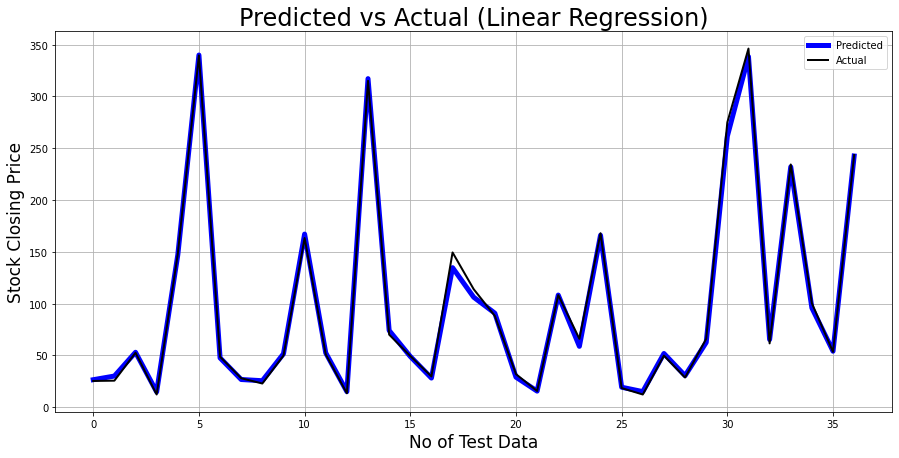

In [108]:
#actual-predicted values plot
plt.figure(figsize=(15,7))
plt.plot(y_pred,color='blue',linewidth=5)
plt.plot(np.array(y_test),color='black',linewidth=2)
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data',fontsize=17)
plt.ylabel('Stock Closing Price',fontsize=17)
plt.title('Predicted vs Actual (Linear Regression)',fontsize=24)
plt.grid()
plt.show()

As we can visulalize our actual and predicted values resembles a lot and there is not much of variation between the both so the linear regression has performed really well.

# **LASSO REGRESSION**

In [109]:
#fitting data
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)
lasso.fit(x_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [110]:
lasso.score(x_train, y_train)

0.9943947120445368

In [111]:
y_pred_lasso = lasso.predict(x_test)

In [112]:
# Visualizing evaluation Metric Score chart
MAE = mean_absolute_error((y_test), (y_pred_lasso ))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (y_pred_lasso ))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAPE=mape(y_test,y_pred_lasso )
print("MAPE :" ,MAPE)

R_squared = r2_score((y_test), (y_pred_lasso ))
print("R_squared :" ,R_squared)

MAE : 3.05311543850478
MSE : 19.989840854050293
RMSE : 4.470999983678181
MAPE : 5.404571039064135
R_squared : 0.9978411177997707


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Here we are using Lasso regression this model is used to check for overfitting of a model and significantly penalises our model parameters.The overall performace of each metric is good.

#### 2. Cross- Validation & Hyperparameter Tuning

In [113]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.037e+03, tolerance: 1.203e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.986e+03, tolerance: 1.205e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.621e+03, tolerance: 1.203e+02

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [114]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -62.90049172560621


In [115]:
# Predict on the model
y_pred_1 = lasso_regressor.predict(x_test)


In [116]:
# Visualizing evaluation Metric Score chart
MAE = mean_absolute_error((y_test), (y_pred_1))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (y_pred_1))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAPE=mape(y_test, y_pred_1)
print("MAPE :" ,MAPE)

R_squared = r2_score((y_test), (y_pred_1))
print("R_squared :" ,R_squared)

MAE : 3.1308568938605053
MSE : 20.878651216190224
RMSE : 4.56931627447589
MAPE : 5.534044585166458
R_squared : 0.9977451271971334


In [117]:
# Visualizing evaluation Metric Score chart
#Inserting errors in dataframe
metricerror_df.loc[i,"Model_Name"]='Lasso regression'
metricerror_df.loc[i,"MAE"]=round(MAE,2)
metricerror_df.loc[i,"MSE"]=round(MSE,2)
metricerror_df.loc[i,"RMSE"]=round(RMSE,2)
metricerror_df.loc[i,"MAPE"]=round(MAPE,2)
metricerror_df.loc[i,"R_squared"]=R_squared

i+=1


##### Which hyperparameter optimization technique have you used and why?

I have used grid search cross validation because it is easy to use and also gives good results comparing to other cross validation and also here size of my data set is small using this cross validation will benifit me.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In this case i have not seen increase in the performace of model through cross validation the performace has degraded rather than increasing.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Here all the evaluation metrics including MAE,MSE,MAPE,RMSE the lower there values are as good they are for our business out of choosing any one that can only be told at the end.
R2 score here signies that 99.7 variance in dependent variable can be predicted by independent variable

**VISUALIZATION**

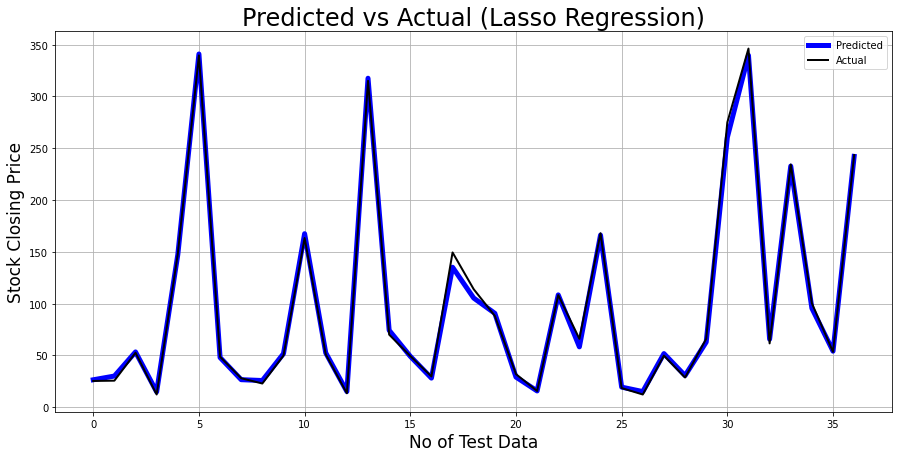

In [118]:
#actual-predicted values plot
plt.figure(figsize=(15,7))
plt.plot(y_pred_1,color='blue',linewidth=5)
plt.plot(np.array(y_test),color='black',linewidth=2)
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data',fontsize=17)
plt.ylabel('Stock Closing Price',fontsize=17)
plt.title('Predicted vs Actual (Lasso Regression)',fontsize=24)
plt.grid()
plt.show()

# **RIDGE REGRESSION**

In [119]:
# ML Model - 3 Implementation

# Fit the Algorithm
#fitting data
ridge  = Ridge(alpha=0.1)
ridge.fit(x_train,y_train)

# Predict on the model

Ridge(alpha=0.1)

In [120]:
ridge.score(x_train, y_train)

0.9920836705746654

In [121]:
y_pred_ridge = ridge.predict(x_test)

In [122]:
# Visualizing evaluation Metric Score chart
MAE = mean_absolute_error((y_test), (y_pred_ridge ))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (y_pred_ridge ))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAPE=mape(y_test,y_pred_ridge )
print("MAPE :" ,MAPE)

R_squared = r2_score((y_test), (y_pred_ridge ))
print("R_squared :" ,R_squared)

MAE : 3.8191663007225713
MSE : 32.45256451461971
RMSE : 5.6967152390320255
MAPE : 6.785573340697846
R_squared : 0.9964951564950447


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Here we are using Ridge regression this model is used to check for overfitting of a model and significantly penalises our model parameters.The overall performace of each metric is has degraded slightly.

#### 2. Cross- Validation & Hyperparameter Tuning

In [123]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.35517e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.22623e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.21991e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [124]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -59.33373789118455


In [125]:
# Predict on the model
y_pred_2 = ridge_regressor.predict(x_test)

In [126]:
# Visualizing evaluation Metric Score chart
MAE = mean_absolute_error((y_test), (y_pred_2))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (y_pred_2))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAPE=mape(y_test, y_pred_2)
print("MAPE :" ,MAPE)

R_squared = r2_score((y_test), (y_pred_2))
print("R_squared :" ,R_squared)

MAE : 3.061022460686151
MSE : 20.0954254856037
RMSE : 4.482792152844441
MAPE : 5.4167371098230985
R_squared : 0.9978297147684337


In [127]:
# Visualizing evaluation Metric Score chart
#Inserting errors in dataframe
metricerror_df.loc[i,"Model_Name"]='Ridge Regression'
metricerror_df.loc[i,"MAE"]=round(MAE,2)
metricerror_df.loc[i,"MSE"]=round(MSE,2)
metricerror_df.loc[i,"RMSE"]=round(RMSE,2)
metricerror_df.loc[i,"MAPE"]=round(MAPE,2)
metricerror_df.loc[i,"R_squared"]=R_squared

i+=1

##### Which hyperparameter optimization technique have you used and why?

I have used grid search cross validation because it is easy to use and also gives good results comparing to other cross validation and also here size of my data set is small using this cross validation will benifit me.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes there is improvement in evaluation metrics after using grid search cross validation our errors has reduced and r2 score has improved from earlier.

c

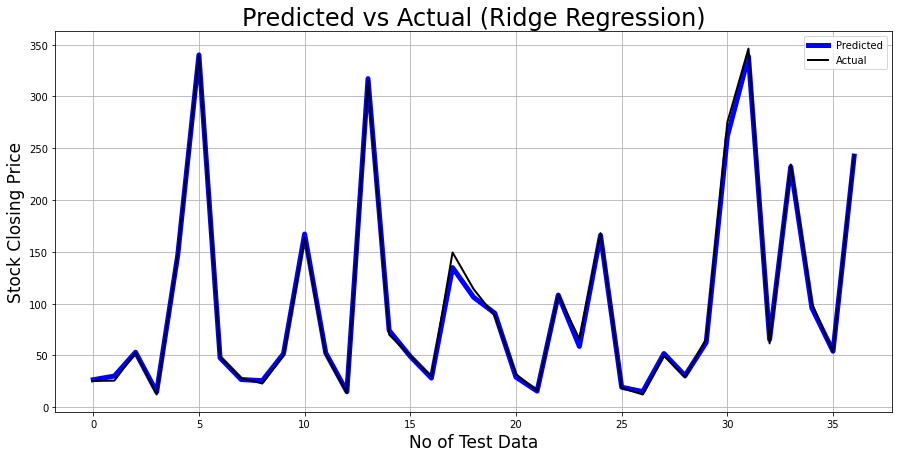

In [128]:
# Visualisation.
plt.figure(figsize=(15,7))
plt.plot(y_pred_2,color='blue',linewidth=5)
plt.plot(np.array(y_test),color='black',linewidth=2)
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data',fontsize=17)
plt.ylabel('Stock Closing Price',fontsize=17)
plt.title('Predicted vs Actual (Ridge Regression)',fontsize=24)
plt.grid()
plt.show()

# **KNN**

In [129]:
#hyperparameter tuning
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)

In [130]:
#fitting data
model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]})

In [137]:
model.best_score_

0.9828767799710741

In [138]:
model.best_params_

{'n_neighbors': 2}

In [131]:
#prediction
y_pred_3=model.predict(x_test)

In [132]:
# Visualizing evaluation Metric Score chart
MAE = mean_absolute_error((y_test), (y_pred_3))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (y_pred_3))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAPE=mape(y_test, y_pred_3)
print("MAPE :" ,MAPE)

R_squared = r2_score((y_test), (y_pred_3))
print("R_squared :" ,R_squared)

MAE : 4.104324324324326
MSE : 37.72864864864864
RMSE : 6.142365069633084
MAPE : 6.4409728288406365
R_squared : 0.9959253448488675


In [135]:
# Visualizing evaluation Metric Score chart
#Inserting errors in dataframe
metricerror_df.loc[i,"Model_Name"]='KNN regressor'
metricerror_df.loc[i,"MAE"]=round(MAE,2)
metricerror_df.loc[i,"MSE"]=round(MSE,2)
metricerror_df.loc[i,"RMSE"]=round(RMSE,2)
metricerror_df.loc[i,"MAPE"]=round(MAPE,2)
metricerror_df.loc[i,"R_squared"]=R_squared

i+=1

**VISUALIZATION**

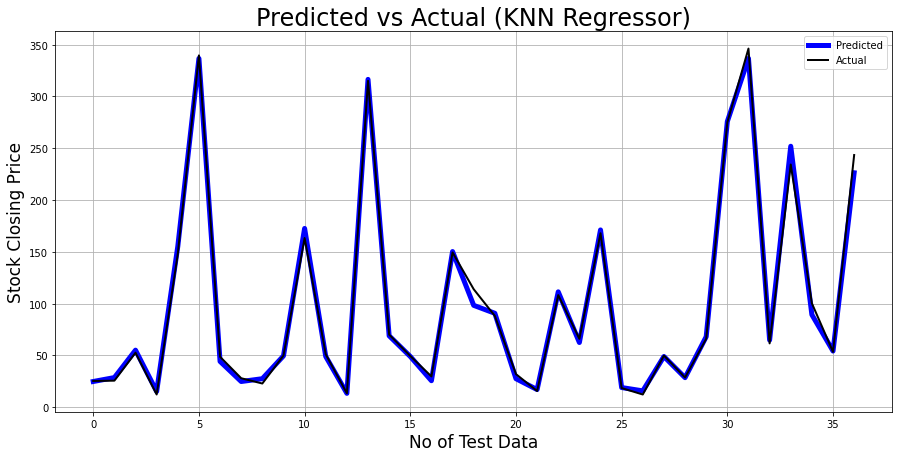

In [136]:
# Visualisation.
plt.figure(figsize=(15,7))
plt.plot(y_pred_3,color='blue',linewidth=5)
plt.plot(np.array(y_test),color='black',linewidth=2)
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data',fontsize=17)
plt.ylabel('Stock Closing Price',fontsize=17)
plt.title('Predicted vs Actual (KNN Regressor)',fontsize=24)
plt.grid()
plt.show()

##### Which hyperparameter optimization technique have you used and why?

I have used grid search cross validation because it is easy to use and also gives good results comparing to other cross validation and also here size of my data set is small using this cross validation will benifit me.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Here i have used k neareset neighbour so using this algorithm i cannot get much good results as compared other algorithm applied so far.

# **XGBOOST REGRESSOR**

Since Xgboost is a black box technique and has a lot of inbuilt functions, we will put untransformed data through it.

In [142]:
#data split
x_train, x_test,y_train, y_test = train_test_split((indep_var),(dep_var),test_size=.20,random_state=1)

In [143]:
#fitting data
xgb = XGBRegressor()
xgb.fit(x_train,y_train)

[15:13:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [146]:
#prediction
y_pred_4 = xgb.predict(x_test)

In [147]:
# Visualizing evaluation Metric Score chart
MAE = mean_absolute_error((y_test), (y_pred_4))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (y_pred_4))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAPE=mape(y_test, y_pred_4)
print("MAPE :" ,MAPE)

R_squared = r2_score((y_test), (y_pred_4))
print("R_squared :" ,R_squared)

MAE : 4.25945175686398
MSE : 32.91328663051823
RMSE : 5.737010251909807
MAPE : 6.839571142342331
R_squared : 0.9964453989815895


In [148]:
# Visualizing evaluation Metric Score chart
#Inserting errors in dataframe
metricerror_df.loc[i,"Model_Name"]='XGBoost regressor'
metricerror_df.loc[i,"MAE"]=round(MAE,2)
metricerror_df.loc[i,"MSE"]=round(MSE,2)
metricerror_df.loc[i,"RMSE"]=round(RMSE,2)
metricerror_df.loc[i,"MAPE"]=round(MAPE,2)
metricerror_df.loc[i,"R_squared"]=R_squared

i+=1

**VISUALIZATION**

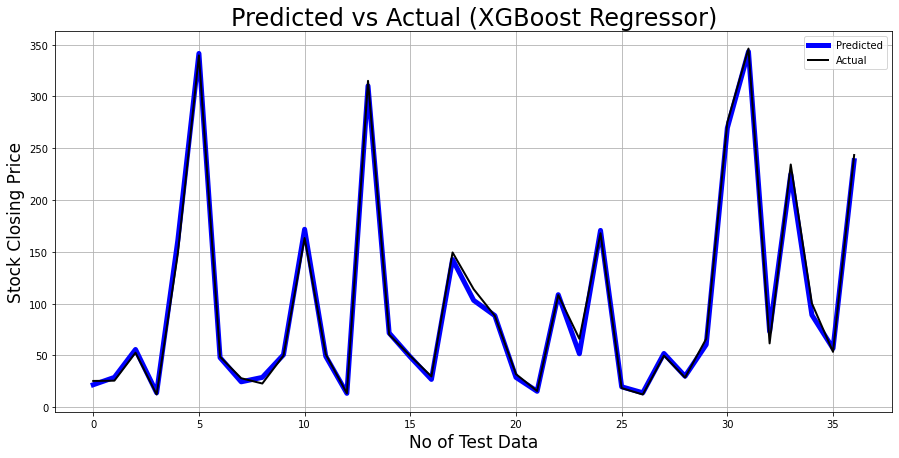

In [149]:
# Visualisation.
plt.figure(figsize=(15,7))
plt.plot(y_pred_4,color='blue',linewidth=5)
plt.plot(np.array(y_test),color='black',linewidth=2)
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data',fontsize=17)
plt.ylabel('Stock Closing Price',fontsize=17)
plt.title('Predicted vs Actual (XGBoost Regressor)',fontsize=24)
plt.grid()
plt.show()

# **METRICS COMPARISION**

We will now compare performance of all the regression models-

In [150]:
#sorting metrics
metricerror_df.sort_values(by=['MAE'],ascending=True,inplace=True)

In [151]:
metricerror_df

,Model_Name,MAE,MSE,RMSE,MAPE,R_squared
0,Linear regression,3.05,19.99,4.47,5.40,0.997841
2,Ridge Regression,3.06,20.10,4.48,5.42,0.997830
1,Lasso regression,3.13,20.88,4.57,5.53,0.997745
3,KNN regressor,4.10,37.73,6.14,6.44,0.995925
4,XGBoost regressor,4.26,32.91,5.74,6.84,0.996445


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Here i am using MAE and RMSE as my Evaluation metric as there values are the lowest implying that the error in our predictions are low.
If i want to chose from both of these i will choose RMSE because the errors are first squared before averaging which poses a high penalty on large errors.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Linear Regression has given the best results with lowest MAE, MSE, RMSE and MAPE scores and highest r2 score apart from that our target variable is highly  dependent on input variables thats the main assumption of linear regression and that is being satisfied.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

I have used various models such as Linear regression,Lasso Regression,Ridge regression,K-nearest neighbours,XG-Boost.
All these models gave a good accuracy,but the Linear regression gave me the best results overall.


In [152]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 10.4 MB/s eta 0:00:00


In [153]:
import shap
shap.initjs()

In [155]:
explainer_test = shap.TreeExplainer(xgb)
shap_values_test = explainer_test.shap_values(x_test)

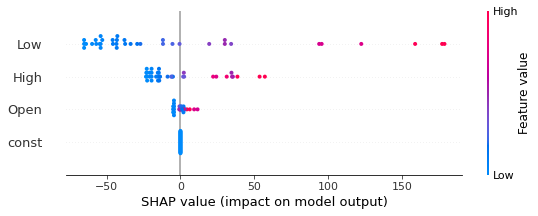

In [156]:
shap.summary_plot(shap_values_test,x_test,plot_type='dot')

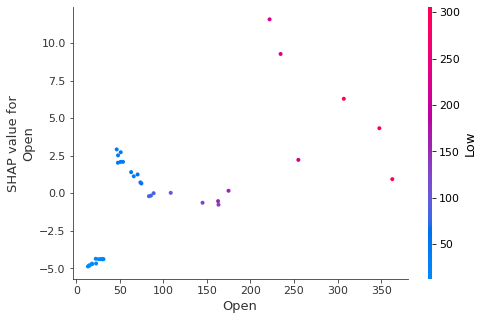

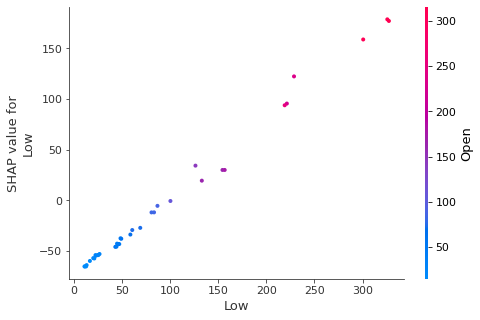

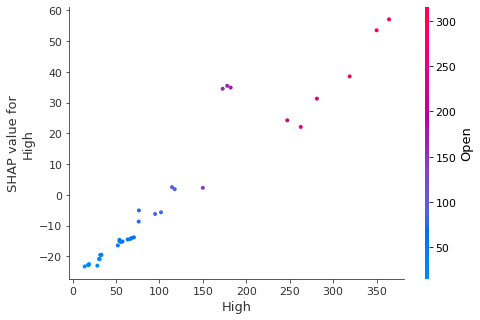

In [157]:
top_vars = ['Open', 'Low', 'High']
for elem in top_vars:
  shap.dependence_plot(elem, shap_values_test, x_test)

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [133]:
#@title
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [134]:
#@title
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**


1. The trend of the price of Yes Bank's stock increased until 2018 and then Close,Open,High,Low price decreased.
2. Based on the open vs. close price graph, we concluded that Yes Bank's stock fell significantly after 2018.
3. Visualization has allowed us to notice that the closing price of the stock has suddenly fallen starting in 2018. It seems reasonable that the Yes Bank stock price was significantly impacted by the Rana Kapoor case fraud.
4. High, Low, Open are directly correlate with the Closing price of stocks.
5. The target variable is highly dependent on input variables.
6. Linear Regression has given the best results with lowest MAE, MSE, RMSE and MAPE scores.
7. Ridge regression shrunk the parameters to reduce complexity and multicollinearity, but ended up affecting the evaluation metrics.
8. Lasso regression did feature selection and ended up giving up worse results than ridge which again reflects the fact that each feature is important (as previously discussed).
9. The accuracy for each model is more than 90%.
10. KNN AND XGBoost have given similar results.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***